In [76]:
import numpy as np
import torch
import torch.nn as nn
import torchvision
import sklearn.datasets as datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

0)prepare data
1) create model

2) create loss and optimizer

3) training loop: forward, backward, weights update

0) prepare data

In [61]:
dataset = torchvision.datasets.MNIST(root=r'C:\Users\Ext.Kiril.Balabanov\Documents\Python Scripts',
                                    transform=torchvision.transforms.ToTensor())

In [62]:
X = dataset.train_data
X = X.view(X.shape[0], -1)
y = dataset.train_labels
mask = ((y==0) | (y==1))
X = X[mask, :]
y = y[mask]

C:\Users\Ext.Kiril.Balabanov\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
C:\Users\Ext.Kiril.Balabanov\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [64]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [65]:
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))

y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)

y_train = y_train.type(torch.float32)
y_test = y_test.type(torch.float32)

In [67]:
n_features = X.shape[1]

In [68]:
class LogisticRegression(nn.Module):
    def __init__(self, n_features):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(n_features, 1)
    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred
model = LogisticRegression(n_features)

In [69]:
loss = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [70]:
n_iter = 10000
for epoch in range(n_iter):
    optimizer.zero_grad()
    y_pred = model.forward(X_train)
    l = loss(y_pred, y_train)
    l.backward()
    optimizer.step()

In [72]:
y_pred = model(X_test).round()
acc = (y_test.eq(y_pred)).sum() / (y_test.shape[0])
print(f'accuracy {acc:.4f}')

accuracy 0.9964


0


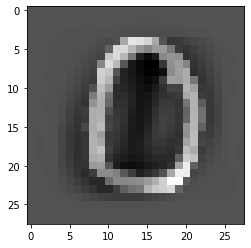

In [93]:
i = 9
plt.imshow(X_test[i].reshape(28,28), cmap="gray")
print(int(y_pred[i].item()))

In [95]:
os.path

NameError: name 'os' is not defined